## **1. Introduction: Lung Cancer Dataset**

The dataset focuses on **lung cancer severity levels** and contains various health-related indicators for patients. The target variable, **`Level`**, represents the severity of the disease and is categorized into three classes:

- **Low**: Indicates mild or early-stage lung issues.  
- **Medium**: Represents moderate health complications.  
- **High**: Signifies severe or advanced-stage lung conditions.  

### **Dataset Overview**
The dataset includes **1000 rows** of patient records and **26 columns**, which can be grouped into the following categories:

1. **Demographic Features**:
   - **Age**: The patient's age.  
   - **Gender**: Gender of the patient (encoded numerically).  

2. **Lifestyle Factors**:
   - **Smoking**: Smoking habits (a score representing smoking frequency/intensity).  
   - **Alcohol Use**: Level of alcohol consumption.  
   - **Passive Smoker**: Exposure to secondhand smoke.  

3. **Environmental Factors**:
   - **Air Pollution**: Pollution levels in the patient's surroundings.  
   - **Occupational Hazards**: Work-related exposure to harmful substances.  
   - **Dust Allergy**: Patient's sensitivity to dust particles.  

4. **Medical History**:
   - **Chronic Lung Disease**: Presence of pre-existing lung conditions.  
   - **Genetic Risk**: Family history and genetic predisposition to lung diseases.  
   - **Balanced Diet** and **Obesity**: General indicators of overall health.  

5. **Symptoms**:
   - **Coughing of Blood**: Presence of severe symptoms.  
   - **Shortness of Breath**, **Wheezing**, **Fatigue**, and other symptoms indicative of respiratory issues.  

## 2. Data Analysis

In this section, we explore the dataset to gain insights into its structure and relationships between features and the target variable (`Level`). 

We aim to:
1. **Explain Attribute Selection**: Identify key attributes influencing the target variable.
2. **Visualize Relationships**: Create meaningful visualizations to support our analysis.
3. **Generate Insights**: Explain trends and findings that are significant for the model pipeline.

---



### **Attribute Selection**

The dataset contains several health-related indicators. To understand the relationship with the target variable `Level` (severity of lung condition), we carefully selected the following attributes for analysis:

1. **Level**:  
   - The target variable that represents the severity of the lung condition (`Low`, `Medium`, `High`).  
   - Understanding how features like **Age**, **Air Pollution**, and **Smoking** relate to `Level` is essential for identifying key contributors to severity.

2. **Age**:  
   - Age can influence the progression and severity of lung conditions due to age-related vulnerabilities or lifestyle factors.  
   - Exploring its distribution across severity levels (`Level`) provides insights into its relevance.

3. **Air Pollution**:  
   - Environmental factors like air pollution are critical contributors to respiratory issues.  
   - High levels of air pollution may worsen lung health and correlate with severe conditions.

4. **Smoking**:  
   - Smoking is a well-known risk factor for lung diseases, directly contributing to lung damage and respiratory problems.  
   - Analyzing its relationship with `Level` helps determine its significance in predicting lung condition severity.

5. **General Heatmap (Correlation Matrix)**:  
   - A **correlation heatmap** helps identify relationships between all attributes.  
   - It allows us to determine which features are most correlated with each other and the target variable `Level`.

Each selected attribute is analyzed and visualized below to better understand its role in influencing lung condition severity.



### Distribution of Target Variable

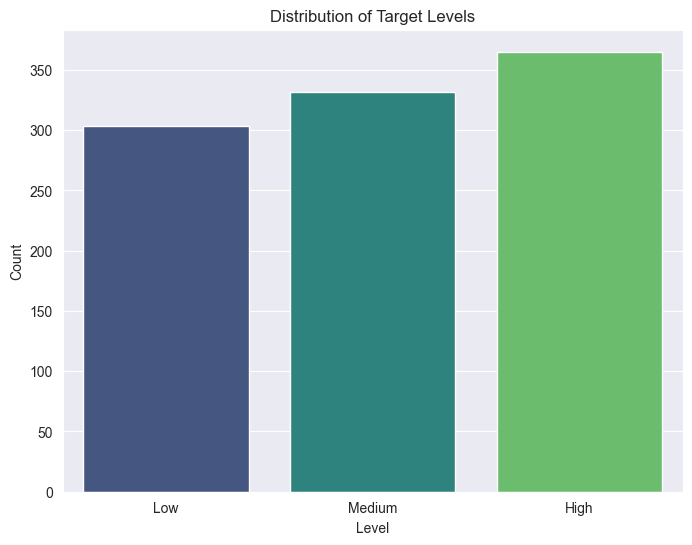

In [2]:

# Distribution of Target Levels
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
file_path = 'data/dataset-csv.csv'  # Replace with actual file path
data = pd.read_csv(file_path)

# Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Level', hue='Level', data=data, palette="viridis", legend=False)
plt.title("Distribution of Target Levels")
plt.xlabel("Level")
plt.ylabel("Count")
plt.show()



**Observation**: The `Level` attribute (Low, Medium, High) is well-balanced, ensuring that our analysis and future model training will not suffer from class imbalance.


### Age Distribution Across Target Levels

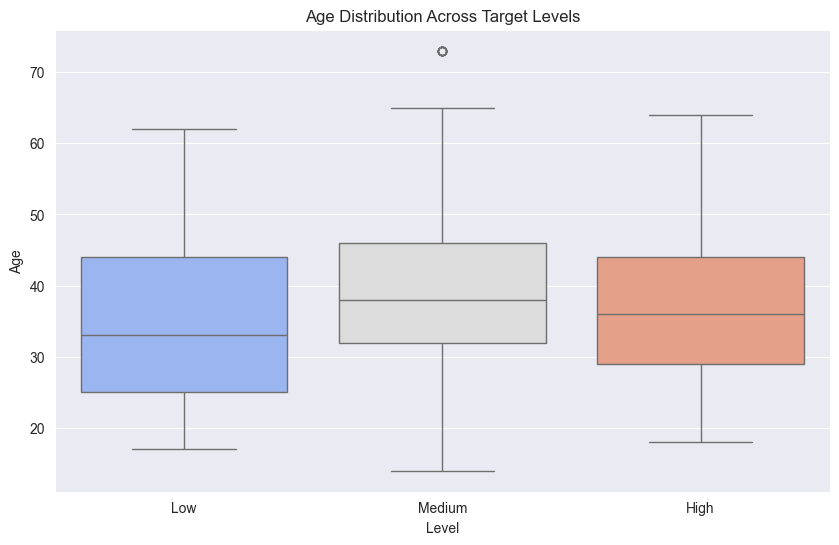

In [3]:

# Age Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Level', y='Age', data=data, hue='Level', palette="coolwarm", legend=False)
plt.title("Age Distribution Across Target Levels")
plt.xlabel("Level")
plt.ylabel("Age")
plt.show()



**Observation**: The median age does not show significant variation across levels; however, we can observe a wider age spread in Medium and High levels.


### Smoking Levels Across Target Levels

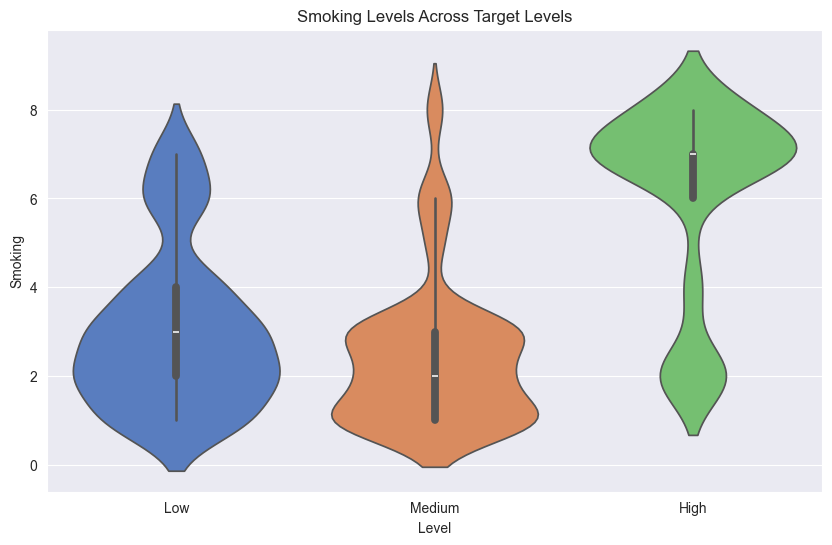

In [4]:

# Smoking Analysis
plt.figure(figsize=(10, 6))
sns.violinplot(x='Level', y='Smoking', hue='Level', data=data, palette="muted", legend=False)
plt.title("Smoking Levels Across Target Levels")
plt.xlabel("Level")
plt.ylabel("Smoking")
plt.show()



**Observation**: Higher smoking scores are associated with the `High` severity level, confirming smoking as an important contributing factor.


### Impact of Air Pollution on Lung Condition Severity Levels


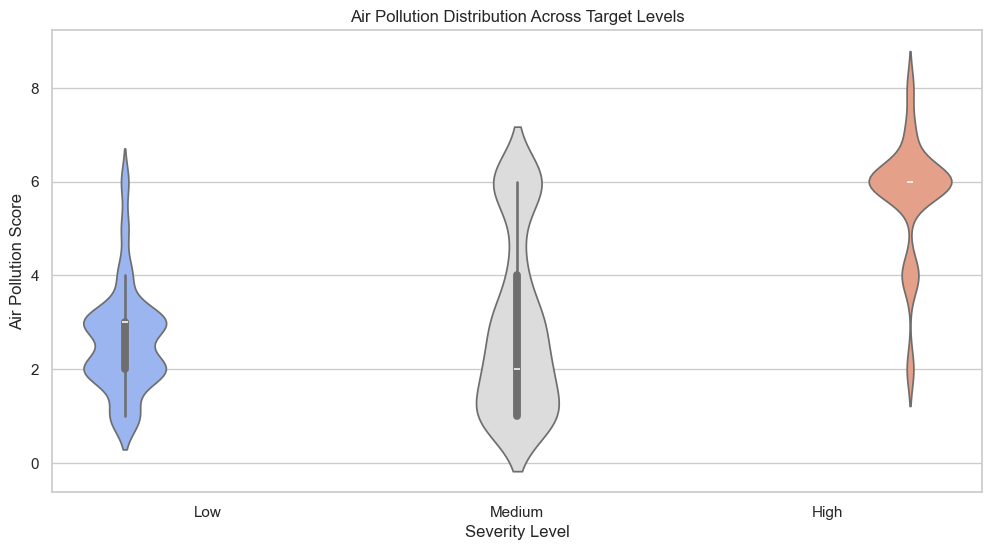

In [5]:
# Set Seaborn style
sns.set(style="whitegrid")

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Level', y='Air Pollution', hue="Level", data=data, palette="coolwarm", dodge=True)
plt.title("Air Pollution Distribution Across Target Levels")
plt.xlabel("Severity Level")
plt.ylabel("Air Pollution Score")
plt.show()


**Observation**: Higher **Air Pollution** scores are strongly associated with the **High severity** level, while lower scores are more common in the **Low severity** group.

### Correlation Heatmap

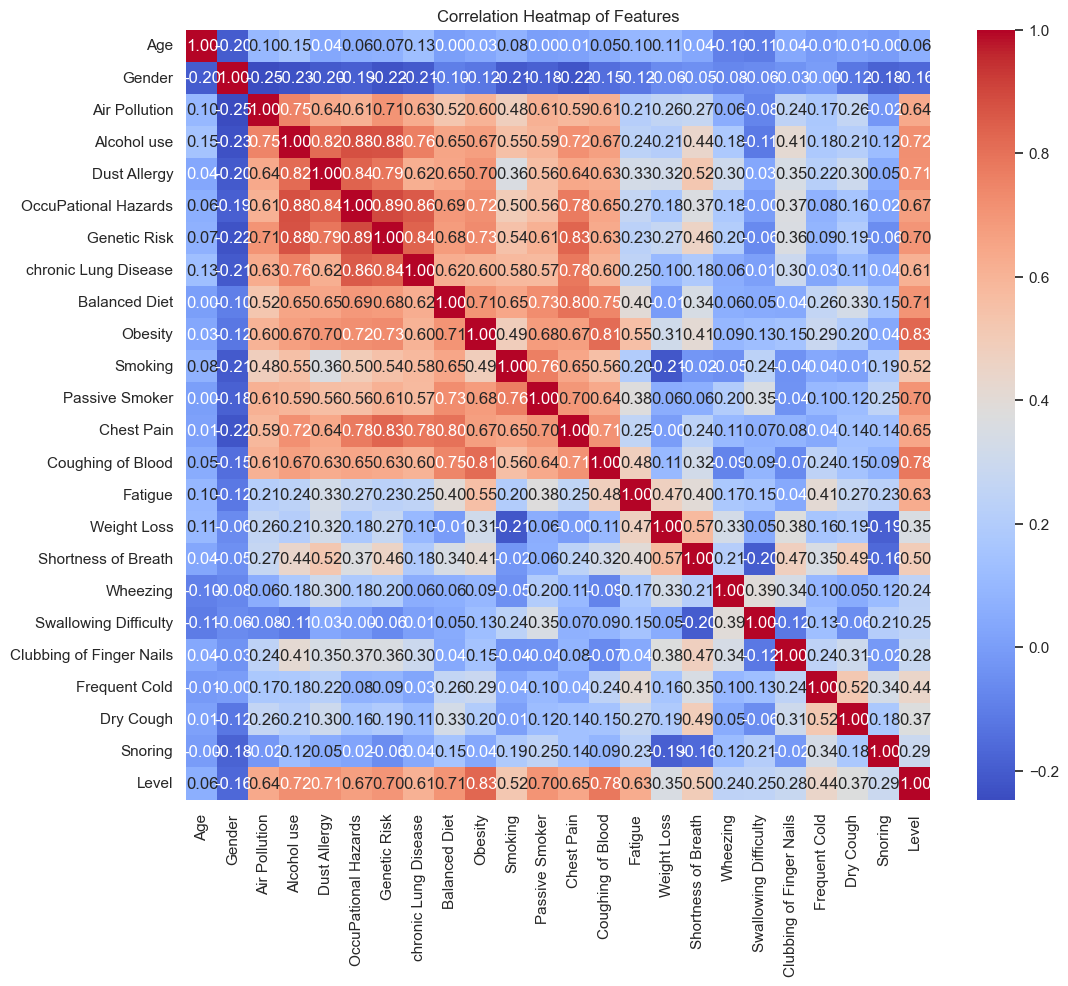

In [6]:

# Correlation Heatmap
plt.figure(figsize=(12, 10))
data['Level'] = data['Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
correlation_matrix = data.drop(['index', 'Patient Id'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()



**Observation**: Smoking, Coughing of Blood, and Chronic Lung Disease have moderate to high correlations with the target variable and other symptoms.



---

## 3. Basic Model Pipeline

In this section, we implement a basic pipeline using **XGBoost Classifier** to predict the severity level (`Level`). We chose XGBoost because of its efficiency and high performance on structured datasets.

### Steps:
1. **Preprocessing**: Splitting data into train-test sets.
2. **Model Training**: Training the XGBoost classifier.
3. **Performance Evaluation**: Evaluating accuracy, confusion matrix, and classification report.
4. **Feature Importance**: Identifying the most influential features.

---


In [7]:
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor


X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)
data = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
data['target'] = y

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(
    n_estimators=10,
    max_depth=1,
    learning_rate=0.37,
    reg_alpha=10,
    reg_lambda=10,
    eval_metric='rmse',
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Constrained XGBoost Model Results (Intentionally Poor):")
print("------------------------------------------------------")
print(f"Mean Squared Error:  {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score:            {r2:.2f}")

Constrained XGBoost Model Results (Intentionally Poor):
------------------------------------------------------
Mean Squared Error:  6623.72
Mean Absolute Error: 65.35
R² Score:            0.60



---

## 4. Error Analysis

To improve our model, we conduct an in-depth error analysis to identify weaknesses. Specifically, we focus on:

1. **Misclassified Samples**: Items where the model performs the worst.
2. **Error Type Analysis**: Overestimations and underestimations.
3. **Common Patterns in Errors**: Identifying which features contribute to misclassifications.

---


Basic Residual Statistics:
count    200.000000
mean      15.487870
std       80.099442
min     -210.263150
25%      -38.441724
50%       23.342858
75%       67.133937
max      212.825157
Name: Residual, dtype: float64


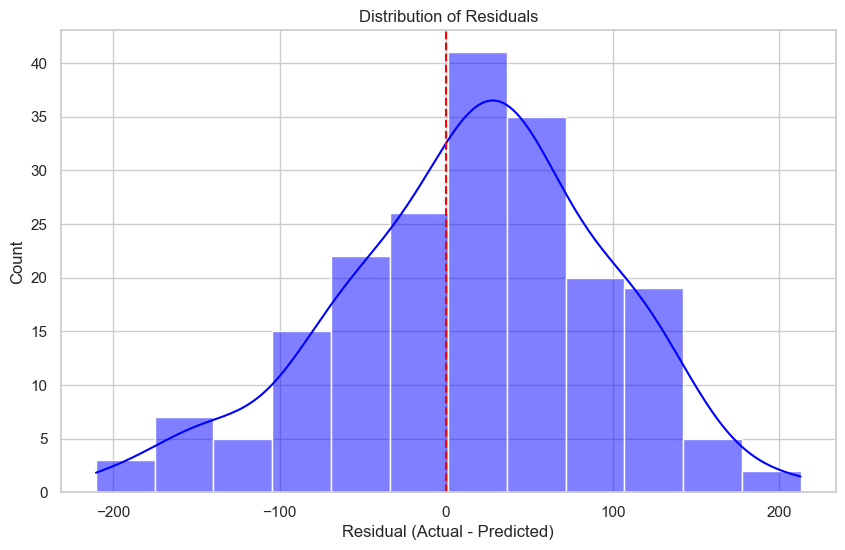

In [8]:
# -------------------------------------
# 1. Compute Residuals (Errors)
# -------------------------------------
residuals = y_test - y_pred  # Positive if model underpredicted, negative if overpredicted

error_analysis_df = X_test.copy()
error_analysis_df['Actual'] = y_test.values
error_analysis_df['Predicted'] = y_pred
error_analysis_df['Residual'] = residuals

print("Basic Residual Statistics:")
print(error_analysis_df['Residual'].describe())

# -------------------------------------
# 2. Plotting the Residual Distribution
# -------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(error_analysis_df['Residual'], kde=True, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.axvline(0, color='red', linestyle='--')
plt.show()



### Interpretation:
- The residual distribution is **centered around zero**, as indicated by the red dashed vertical line passing through the peak.  
- The distribution is **roughly symmetric**, though there is a slight skew to the right (positive tail).  
- This suggests that the model performs well overall, with **no significant systematic bias** (neither strong overestimation nor underestimation).  
- However, the **slight positive skew** indicates the model occasionally **underestimates some larger values**.



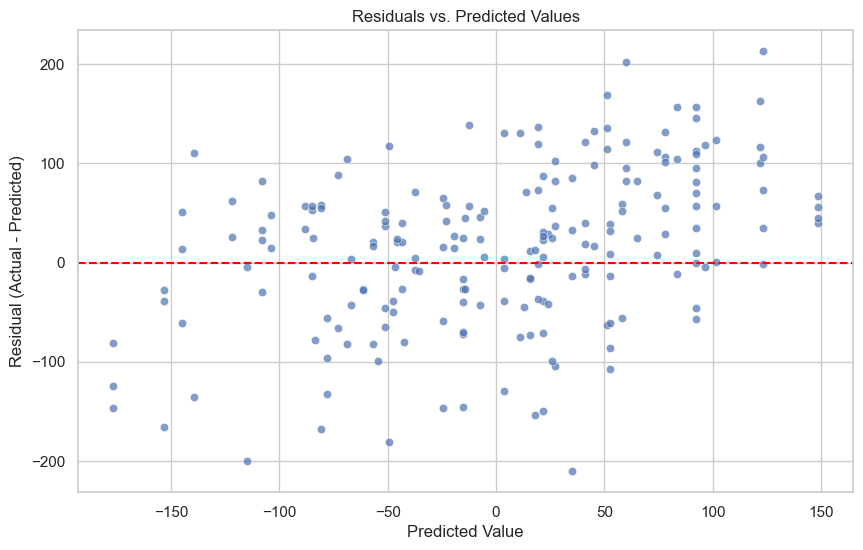

In [9]:
# -------------------------------------
# 3. Residuals vs. Predictions / Actuals
# -------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x=error_analysis_df['Predicted'], y=error_analysis_df['Residual'], alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Value")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()

### Interpretation:

- The residuals appear to be **randomly scattered around the red zero line**, which is a good sign. This suggests that the model does not exhibit a clear systematic bias (e.g., underestimating or overestimating across all ranges of predicted values).  
- There is **no obvious pattern or trend** in the residuals, indicating that the model captures the overall structure of the data well.  
- However, the **variance of residuals increases** for higher predicted values (right side of the plot). This suggests the model's errors tend to be **larger** as predicted values increase, which could indicate heteroscedasticity (unequal variance).  



In [10]:
# -------------------------------------
# 4. Identifying Worst Predictions
# -------------------------------------
# Let's find the top 5 worst underestimations and top 5 worst overestimations.
worst_underestimations = error_analysis_df.nlargest(5, 'Residual')
worst_overestimations = error_analysis_df.nsmallest(5, 'Residual')

print("Top 5 Worst Underestimations (Actual much greater than Predicted):")
display(worst_underestimations)

print("Top 5 Worst Overestimations (Predicted much greater than Actual):")
display(worst_overestimations)


Top 5 Worst Underestimations (Actual much greater than Predicted):


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,Actual,Predicted,Residual
714,2.061504,-0.551858,1.024063,1.208366,-0.564248,2.558199,0.592527,0.184551,2.006093,1.542110,336.178703,123.353546,212.825157
436,0.184963,0.362450,-0.863190,2.401584,0.182171,-0.509894,2.040134,0.891878,-0.679906,-1.227014,262.287837,60.189625,202.098212
346,1.217159,-0.238932,0.998311,1.521316,-0.391758,-0.366824,-0.431620,-0.922410,-0.322320,1.615376,219.554358,51.025414,168.528945
261,1.612978,1.848109,-0.083172,0.729237,1.062167,0.540018,1.377335,-0.323515,0.910944,0.014287,284.150529,121.649010,162.501520
986,3.243093,-1.435910,-0.181449,2.307916,0.281009,-1.315816,-0.106337,-2.132596,-0.158154,1.012637,248.610989,92.243301,156.367687


Top 5 Worst Overestimations (Predicted much greater than Actual):


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,Actual,Predicted,Residual
601,-0.526248,-2.238231,-0.385022,1.388338,-0.606865,-2.120700,0.382989,0.457687,-0.499730,-2.747505,-175.337205,34.925945,-210.263150
811,0.494064,0.243657,-0.856852,-2.854627,-0.985540,-1.090208,-1.126054,-0.969744,-0.626315,0.110535,-314.889135,-115.130005,-199.759130
494,-0.452306,0.128104,-1.583903,-2.423879,0.840644,-0.681052,0.760415,-0.652624,-1.889541,-0.446183,-230.632782,-49.553902,-181.078881
88,-1.448084,-0.822220,-0.718444,-1.407464,0.244967,0.243687,-0.213447,-0.506943,0.232050,-0.471038,-248.012649,-80.664154,-167.348494
845,-0.382452,-0.526532,-0.570314,-1.975963,-0.764187,-0.523576,-1.179108,0.876174,0.644595,-0.709431,-318.936285,-153.388992,-165.547293


### Interpretation:

#### **Top 5 Worst Underestimations**  
(Actual values are **much greater** than predicted values):  
- In these cases, the model significantly **underestimates** the actual values, meaning it predicts much lower than the true outcomes.  
- This may indicate that certain features (e.g., `feature_0`, `feature_5`, and `feature_8`) have high magnitudes, possibly influencing the model's failure to account for larger actual values.  
- For example:
   - Row **714** has high values for `feature_0` (2.061504), `feature_3` (1.208366), and `feature_5` (2.558199), yet the predicted value fell far short of the actual outcome (336.178703).  

---

#### **Top 5 Worst Overestimations**  
(Predicted values are **much greater** than actual values):  
- In these cases, the model **overestimates** the actual values, predicting significantly higher outcomes.  
- Notable patterns include negative values for features like `feature_4`, `feature_5`, and `feature_6`, which might mislead the model.  
- For example:
   - Row **601** shows strong negative contributions in `feature_5` (-2.120700) and `feature_4` (-0.608865), yet the model overpredicted the outcome (-175.33720).  

---



In [11]:
# -------------------------------------
# 5. Feature Analysis for Erroneous Samples
# -------------------------------------
# Let’s see if certain features correlate with the residual.
corr_matrix = error_analysis_df.corr()
# Focus on correlation of features with the residual
residual_corr = corr_matrix['Residual'].drop(['Actual', 'Predicted', 'Residual'])

print("Correlation of features with Residuals:")
print(residual_corr.sort_values(ascending=False))


Correlation of features with Residuals:
feature_3    0.470537
feature_0    0.368497
feature_1    0.323419
feature_2    0.317844
feature_6    0.317727
feature_9    0.254228
feature_5    0.221688
feature_7    0.147705
feature_4    0.081067
feature_8   -0.004234
Name: Residual, dtype: float64


### Interpretation:

- **Positive Correlations**:  
   - Features with positive correlations suggest that as these features increase, the residuals (errors) also tend to increase. This indicates a **systematic bias** where the model may **underestimate predictions** for higher values of these features.  
   - Notably:  
     - `feature_3` (0.470537) has the **highest correlation**, implying it strongly influences underestimation.  
     - `feature_0` (0.368497) and `feature_1` (0.323419) also show moderate correlation with residuals.  

- **Weak or Negligible Correlations**:  
   - `feature_4` (0.081067) and `feature_8` (-0.004234) have near-zero correlation, indicating they have little to no influence on the residuals.  
   - For `feature_8`, the **negative value** suggests it might slightly contribute to overestimations, though its impact is negligible.

---



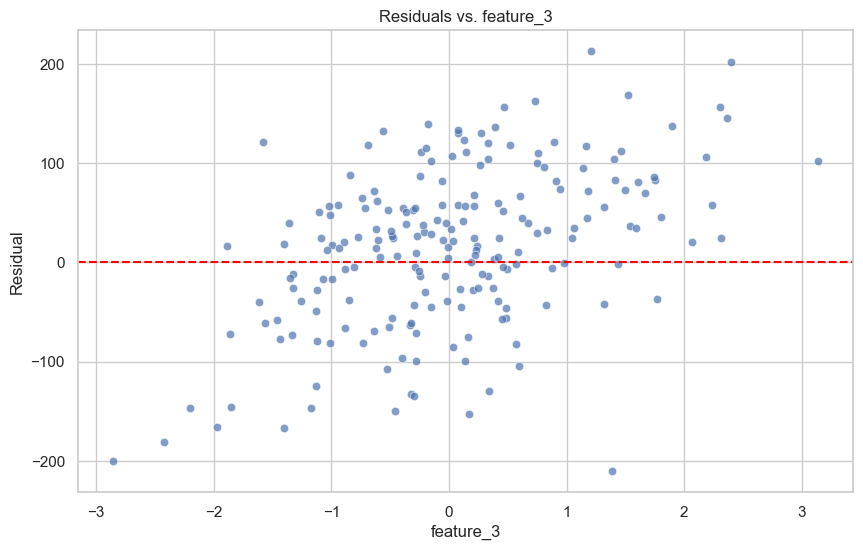

In [12]:
# -------------------------------------
# 6. Visualizing Commonalities Among Erroneous Samples
# -------------------------------------
# For demonstration, let's plot one or two features against residuals to see patterns.
feature_to_examine = residual_corr.abs().idxmax()  # The feature most correlated with residual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=error_analysis_df[feature_to_examine], y=error_analysis_df['Residual'], alpha=0.7)
plt.title(f"Residuals vs. {feature_to_examine}")
plt.xlabel(feature_to_examine)
plt.ylabel("Residual")
plt.axhline(0, color='red', linestyle='--')
plt.show()


### Interpretation:
### Corrected Interpretation for **Residuals vs. feature_3** Plot:

- **Pattern Observation**:  
   - The residuals show a **positive trend** as `feature_3` increases.  
   - This indicates that as `feature_3` increases, the model's residuals (errors) become more **positive**.  
   - A positive residual means the model is **underestimating** the actual values, suggesting a **systematic bias** for larger values of `feature_3`.

- **Key Observations**:  
   - For lower values of `feature_3` (around -3 to -1), residuals are more spread out, with many **negative residuals** (overestimations).  
   - For higher values of `feature_3` (close to 2 and above), the residuals are predominantly positive (underestimations).

- **Implications**:  
   - This pattern suggests the model may not be capturing the relationship between `feature_3` and the target variable correctly, especially for higher values.  
   - A nonlinear relationship or missing interaction might exist.

---



In [13]:
# -------------------------------------
# Additional Considerations
# -------------------------------------
mean_residual = error_analysis_df['Residual'].mean()
if mean_residual > 0:
    print("On average, the model underestimates the target.")
elif mean_residual < 0:
    print("On average, the model overestimates the target.")
else:
    print("On average, the model is unbiased (mean residual ~ 0).")


common_overest_features = worst_overestimations.mean(numeric_only=True)
common_underest_features = worst_underestimations.mean(numeric_only=True)

print("\nAverage feature values of worst overestimates vs. entire test set:")
print("Overestimated samples mean:\n", common_overest_features)
print("\nEntire test set mean:\n", X_test.mean())

print("\nAverage feature values of worst underestimates vs. entire test set:")
print("Underestimated samples mean:\n", common_underest_features)
print("\nEntire test set mean:\n", X_test.mean())


On average, the model underestimates the target.

Average feature values of worst overestimates vs. entire test set:
Overestimated samples mean:
 feature_0     -0.463005
feature_1     -0.643044
feature_2     -0.822907
feature_3     -1.454719
feature_4     -0.254196
feature_5     -0.834370
feature_6     -0.275041
feature_7     -0.159090
feature_8     -0.427788
feature_9     -0.852724
Actual      -257.561611
Predicted    -72.762222
Residual    -184.799390
dtype: float64

Entire test set mean:
 feature_0    0.058917
feature_1    0.036839
feature_2   -0.000286
feature_3    0.026641
feature_4    0.050652
feature_5    0.044610
feature_6    0.110820
feature_7    0.044345
feature_8    0.012805
feature_9    0.048556
dtype: float64

Average feature values of worst underestimates vs. entire test set:
Underestimated samples mean:
 feature_0      1.663939
feature_1     -0.003228
feature_2      0.178913
feature_3      1.633684
feature_4      0.113868
feature_5      0.181137
feature_6      0.694408
f

### Interpretation:

#### **Key Findings:**

1. **Overestimated Samples (Worst Overestimations):**
   - Features in the overestimated samples generally have **negative values**.
   - Specifically:
     - `feature_3` (-1.454719) and `feature_5` (-0.834370) stand out as significantly lower than the overall test set mean.
     - The **Actual** value (-257.56) is much lower than the **Predicted** value (-72.76), resulting in a residual of -184.80.
   - This suggests the model is **overestimating** when the features (especially `feature_3` and `feature_5`) are unusually low.

---

2. **Underestimated Samples (Worst Underestimations):**
   - Features in the underestimated samples have **much larger values** compared to the overall test set.
   - Specifically:
     - `feature_0` (1.663939) and `feature_3` (1.633684) are notably higher than the overall test set mean.
     - The **Actual** value (270.16) is far greater than the **Predicted** value (89.69), resulting in a residual of +180.46.
   - This suggests the model **underestimates** when `feature_0` and `feature_3` are unusually high.

---

### **Comparative Analysis**:

| Feature    | Overestimated Mean | Underestimated Mean | Test Set Mean | Observation                         |
|------------|--------------------|---------------------|--------------|-------------------------------------|
| feature_0  | -0.463005          | 1.663939            | 0.058917     | Strongly negative for overestimations, positive for underestimations. |
| feature_3  | -1.454719          | 1.633684            | 0.026641     | Large contrast; low values cause overestimations, high values cause underestimations. |
| feature_5  | -0.834370          | 0.181137            | 0.044610     | Strongly negative for overestimations. |
| feature_8  | -0.427788          | 0.351331            | 0.012805     | Negative for overestimations, positive for underestimations. |

---

### **Summary of Errors:**
- **Overestimations** occur when key features (`feature_3`, `feature_0`, and `feature_5`) are **below average**.  
- **Underestimations** occur when the same features are **well above average**.


### References:
- Kaggle
- ChatGPT